# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [90]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [2]:
spambase = pd.read_csv("datasets/spambase_binary.csv")
spambase.head(5)

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [4]:
X = spambase.drop(columns = "is_spam")
y = spambase["is_spam"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

***YOU NEED TO SET RANDOM STATE!***

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [10]:
lr = LogisticRegression(solver = "lbfgs")
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
cm_train = confusion_matrix(y_train, lr.predict(X_train))
cm_train = cm_train/y_train.size
cm_train

array([[0.58236715, 0.02560386],
       [0.03937198, 0.352657  ]])

In [15]:
y_test.size

461

In [17]:
cm_test = confusion_matrix(y_test, lr.predict(X_test))
cm_test = cm_test/461
cm_test

array([[0.55965293, 0.02819957],
       [0.04338395, 0.36876356]])

***The generalizer seems to do as well a training data for the test set.***

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [25]:
i = spambase.columns.get_loc("word_freq_hp_binarized")
lr.coef_[0,i]

-2.639347200187697

In [27]:
i = spambase.columns.get_loc("char_freq_$_binarized")
lr.coef_[0,i]

1.698642733252472

***This suppors that since coefficient for hp is negative, hp is likely to be in non-spam emails. for `$` this means that the character is more likely to be seen in spam emails.For real-valued attributes, if paramter was character count of `$` then more of those characters would push the score towards more likely spam***

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [28]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, lsvc.predict(X_train))
cm_train = cm_train/y_train.size
print(cm_train)

[[0.58188406 0.02608696]
 [0.03937198 0.352657  ]]


In [29]:
cm_test = confusion_matrix(y_test, lsvc.predict(X_test))
cm_test = cm_test/461
print(cm_test)

[[0.55965293 0.02819957]
 [0.05206074 0.36008677]]


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [30]:
i = spambase.columns.get_loc("word_freq_hp_binarized")
lsvc.coef_[0,i]

-0.856770935597541

In [31]:
i = spambase.columns.get_loc("char_freq_$_binarized")
lsvc.coef_[0,i]

0.5693543161872375

***These coefficents are smaller in scale compared to Logistic Regression since it doesn't go through the sigmond function? ***

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

***SVM and LR using weights to determine the boundary. LR uses the closeness of a the score to 0 or 1 while SVM uses positive or negative score***

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [33]:
svc = SVC(kernel = "rbf")
svc.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, svc.predict(X_train))
cm_train = cm_train/y_train.size
print(cm_train)
cm_test = confusion_matrix(y_test, svc.predict(X_test))
cm_test = cm_test/461
print(cm_test)

[[0.58405797 0.02391304]
 [0.04178744 0.35024155]]
[[0.56616052 0.02169197]
 [0.04772234 0.36442516]]


In [34]:
svc = SVC(kernel = "poly")
svc.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, svc.predict(X_train))
cm_train = cm_train/y_train.size
print(cm_train)
cm_test = confusion_matrix(y_test, svc.predict(X_test))
cm_test = cm_test/461
print(cm_test)

[[0.60193237 0.00603865]
 [0.19371981 0.19830918]]
[[0.5813449  0.00650759]
 [0.18438178 0.22776573]]


***rbf kernel works the best***

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [35]:
# Load Splice Train Here
splice_train = pd.read_csv("datasets/splice_train.csv")
# Your Code goes here:
splice_train.head(10)

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [36]:
# Load Splice Test Here
splice_test = pd.read_csv("datasets/splice_test.csv")
# Your Code goes here:
splice_test.head(10)

,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [47]:
t = CategoricalDtype(categories=['D', 'N', 'S', 'A', 'G', 'T', 'C'], ordered=False)

In [48]:
X_train = splice_train.drop(columns = "class")
y_train = splice_train["class"]
X_test = splice_test.drop(columns="class")
y_test = splice_test["class"]

D: A or G or T
N: A or G or C or T
S: C or G
R: A or G

In [49]:
X_train = X_train.astype(t)
X_train = pd.get_dummies(X_train)
X_train.head()

,pos0_D,pos0_N,pos0_S,pos0_A,pos0_G,pos0_T,pos0_C,pos1_D,pos1_N,pos1_S,...,pos58_G,pos58_T,pos58_C,pos59_D,pos59_N,pos59_S,pos59_A,pos59_G,pos59_T,pos59_C
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [50]:
X_test = X_test.astype(t)
X_test = pd.get_dummies(X_test)
X_test.head()

,pos0_D,pos0_N,pos0_S,pos0_A,pos0_G,pos0_T,pos0_C,pos1_D,pos1_N,pos1_S,...,pos58_G,pos58_T,pos58_C,pos59_D,pos59_N,pos59_S,pos59_A,pos59_G,pos59_T,pos59_C
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2935, 420)
(2935,)
(255, 420)
(255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [53]:
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train, y_train)
cm_train = confusion_matrix(y_train, knc.predict(X_train))
cm_train = cm_train/y_train.size
print(cm_train)
print(np.trace(cm_train))

[[2.43611584e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.43270869e-01 0.00000000e+00]
 [0.00000000e+00 3.40715503e-04 5.12776831e-01]]
0.9996592844974446


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***I think for 1-nearest neighbour might be overfit to the training data :( Test performance will not be good***

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [54]:
cm_test = confusion_matrix(y_test, knc.predict(X_test))
cm_test = cm_test/y_test.size
print(cm_test)
print(np.trace(cm_test))

[[0.2        0.00392157 0.        ]
 [0.01568627 0.16862745 0.02745098]
 [0.10196078 0.10196078 0.38039216]]
0.7490196078431373


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

In [69]:
count = y_test.value_counts()
count

N     149
IE     54
EI     52
Name: class, dtype: int64

<BarContainer object of 3 artists>

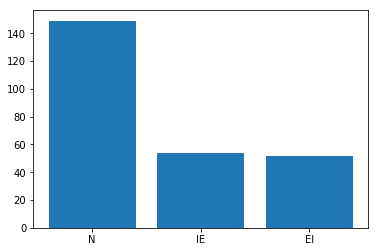

In [71]:
plt.bar([1, 2, 3], count, tick_label = ["N", "IE", "EI"])

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [72]:
149/y_test.size

0.5843137254901961

### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [76]:
def k_test (n):
    knc = KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    cm_test = confusion_matrix(y_test, knc.predict(X_test))
    cm_test = cm_test/y_test.size
    #print(cm_test)
    print(np.trace(cm_test))

In [77]:
k_test(5)
k_test(10)
k_test(50)
k_test(100)
k_test(200)
k_test(500)
k_test(1000)
k_test(1500)
k_test(2000)

0.7686274509803921
0.7960784313725491
0.8627450980392157
0.8941176470588235
0.9058823529411765
0.9529411764705883
0.9529411764705883
0.6980392156862746
0.5843137254901961


***Greater neighbors ==> dumber model but there is a sweet spot at n = 500***

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

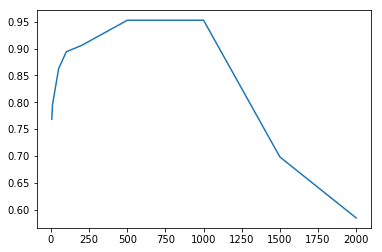

In [78]:
acc = [0.7686274509803921,0.7960784313725491,0.8627450980392157,0.8941176470588235,0.9058823529411765,0.9529411764705883,0.9529411764705883,0.6980392156862746,0.5843137254901961]
plt.plot([5, 10, 50, 100, 200, 500, 1000, 1500, 2000], acc)

***There's most def a sweet spot in the middle at n = 500***

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [79]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

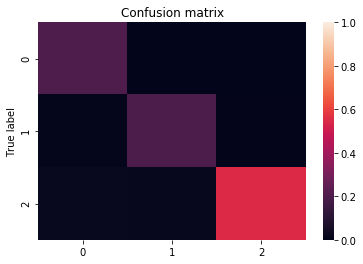

In [80]:
n = 500
knc = KNeighborsClassifier(n_neighbors=n)
knc.fit(X_train, y_train)
cm_test = confusion_matrix(y_test, knc.predict(X_test))
cm_test = cm_test/y_test.size
plot_confusion_matrix(cm_test)

***Pretty good confusion matrix?***

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

In [81]:
n_lst = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]

In [91]:
def get_loss (n):
    knc = KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train, y_train)
    prob = knc.predict_proba(X_test)
    return log_loss(y_test, prob)

In [92]:
ll = []
for n in n_lst:
    ll.append(get_loss(n))

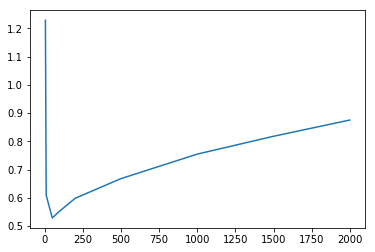

In [94]:
plt.plot(n_lst, ll)

***a good ole elbow plot that we love, 100 woud be better ***

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***No bc SVM is a discriminatory model and not a generative one***